In [3]:
pip install xgboost

In [4]:
pip install imbalanced-learn

In [5]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import shap
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the dataset (make sure this file path is correct)
file_path = r'D:\HPLC data.csv'  # Ensure path is correct
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

   Sl No              Age  Gender  Religion   Present District  HbA0  HbA2  \
0      1  14 Yrs 11 month  Female  Hinduism             Howrah  86.2   2.9   
1      2   16 Yrs 0 month  Female  Hinduism            Kolkata  86.4   4.8   
2      3   16 Yrs 2 month    Male  Hinduism            Hooghly  87.3   3.2   
3      4   21 Yrs 0 month  Female  Hinduism  South 24-Parganas  87.9   2.8   
4      5   35 Yrs 3 month    Male  Hinduism   Midnapore (East)  84.3   2.8   

   HbF  S-Window  Unknown   RBC    HB   MCV   MCH  MCHC  RDWcv Weekness  \
0  0.3       0.0      0.0  4.81  13.2  86.7  28.8  33.0   13.8       No   
1  0.4       0.0      0.0  4.18  10.9  78.9  26.1  33.0   14.6       No   
2  0.5       0.0      0.0  5.31  13.6  87.0  25.6  29.4   13.7       No   
3  0.2       0.0      0.0  4.64  11.5  78.7  44.8  31.5   14.5       No   
4  0.2       0.0      0.0  5.50  14.0  69.7  21.5  30.9   16.5       No   

  Jaundice                  Diagnosis  
0       No                   Normal    


In [9]:
# Display the data types of each column
print(data.dtypes)

Sl No                 int64
Age                  object
Gender               object
Religion             object
Present District     object
HbA0                float64
HbA2                float64
HbF                 float64
S-Window            float64
Unknown             float64
RBC                 float64
HB                  float64
MCV                 float64
MCH                 float64
MCHC                float64
RDWcv               float64
Weekness             object
Jaundice             object
Diagnosis            object
dtype: object


In [10]:
# Check for missing values in the dataset
print(data.isnull().sum())

Sl No                0
Age                  6
Gender               0
Religion            36
Present District    14
HbA0                 0
HbA2                 0
HbF                  0
S-Window             0
Unknown              0
RBC                  0
HB                   0
MCV                  0
MCH                  0
MCHC                 0
RDWcv                0
Weekness            10
Jaundice            11
Diagnosis            0
dtype: int64


In [11]:
# Extract the years and months, and convert to total months
data['Age'] = data['Age'].str.extract('(\d+)').astype(float)  # Extract the numeric part of years
data['Age'] = data['Age'].fillna(data['Age'].median())  # Fill missing values with the median

# Display the updated 'Age' column
print(data['Age'].head())

0    14.0
1    16.0
2    16.0
3    21.0
4    35.0
Name: Age, dtype: float64


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Asus\AppData\Local\Temp\ipykernel_468\2931335158.py:2: SyntaxWarning: invalid escape sequence '\d'
  data['Age'] = data['Age'].str.extract('(\d+)').astype(float)  # Extract the numeric part of years


In [12]:
# Automatically find all numerical columns in the dataset
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

In [13]:
# Fill missing values with the median for numerical columns
data[numerical_columns] = data[numerical_columns].apply(lambda x: x.fillna(x.median()), axis=0)

# For categorical columns (if any), fill missing values with the mode (most frequent value)
categorical_columns = ['Gender', 'Religion', 'Present District']  # Modify if needed
for col in categorical_columns:
    data[col] = data[col].fillna(data[col].mode()[0])

# Display the number of missing values after filling
print(data.isnull().sum())


Sl No                0
Age                  0
Gender               0
Religion             0
Present District     0
HbA0                 0
HbA2                 0
HbF                  0
S-Window             0
Unknown              0
RBC                  0
HB                   0
MCV                  0
MCH                  0
MCHC                 0
RDWcv                0
Weekness            10
Jaundice            11
Diagnosis            0
dtype: int64


In [14]:
# Fill missing values in 'Weekness' and 'Jaundice' columns with the mode
data['Weekness'] = data['Weekness'].fillna(data['Weekness'].mode()[0])
data['Jaundice'] = data['Jaundice'].fillna(data['Jaundice'].mode()[0])

# Display the number of missing values again to confirm
print(data.isnull().sum())

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [15]:
# Assuming 'data' is your loaded dataset

# Identify numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Dictionary to store the range for each numerical column
column_ranges = {}

for column in numerical_columns:
    min_value = data[column].min()
    max_value = data[column].max()
    column_ranges[column] = (min_value, max_value)

# Print the range of each numerical column
print("Range of each numerical column:")
for column, (min_value, max_value) in column_ranges.items():
    print(f"{column}: Min = {min_value}, Max = {max_value}")

Range of each numerical column:
Sl No: Min = 1, Max = 13031
Age: Min = 0.0, Max = 77.0
HbA0: Min = 2.2, Max = 93.4
HbA2: Min = 1.4, Max = 96.2
HbF: Min = 0.0, Max = 93.6
S-Window: Min = 0.0, Max = 80.1
Unknown: Min = 0.0, Max = 88.4
RBC: Min = 0.86, Max = 9.43
HB: Min = 1.1, Max = 41.1
MCV: Min = 8.3, Max = 114.5
MCH: Min = 10.3, Max = 78.8
MCHC: Min = 16.0, Max = 316.0
RDWcv: Min = 9.9, Max = 42.3


In [16]:
# Dictionary to store the count of outliers for each column using Z-score
z_outlier_count = {}

for column in numerical_columns:
    mean = data[column].mean()
    std_dev = data[column].std()
    
    # Calculate Z-scores
    z_scores = (data[column] - mean) / std_dev
    
    # Find outliers (Z-score greater than 3 or less than -3)
    z_outlier_count[column] = (abs(z_scores) > 3).sum()

# Print the count of outliers for each column
print("Outliers count (Z-score Method):")
for column, count in z_outlier_count.items():
    print(f"{column}: {count}")

Outliers count (Z-score Method):
Sl No: 0
Age: 99
HbA0: 576
HbA2: 559
HbF: 40
S-Window: 53
Unknown: 26
RBC: 55
HB: 63
MCV: 48
MCH: 49
MCHC: 7
RDWcv: 182


In [17]:
# Iterate over each numerical column, excluding 'Age'
for column in numerical_columns:
    if column == 'Age':  # Skip the 'Age' column
        continue
    
    mean = data[column].mean()
    std_dev = data[column].std()
    
    # Calculate Z-scores
    z_scores = (data[column] - mean) / std_dev
    
    # Find outliers (Z-score greater than 3 or less than -3)
    outlier_indices = abs(z_scores) > 3
    
    # Replace outliers with the median of the column
    median_value = data[column].median()
    data[column] = data[column].where(~outlier_indices, median_value)

# Print the updated data (optional)
print("Data after replacing outliers with median (excluding 'Age' column):")
print(data.head())

Data after replacing outliers with median (excluding 'Age' column):


   Sl No   Age  Gender  Religion   Present District  HbA0  HbA2  HbF  \
0      1  14.0  Female  Hinduism             Howrah  86.2   2.9  0.3   
1      2  16.0  Female  Hinduism            Kolkata  86.4   4.8  0.4   
2      3  16.0    Male  Hinduism            Hooghly  87.3   3.2  0.5   
3      4  21.0  Female  Hinduism  South 24-Parganas  87.9   2.8  0.2   
4      5  35.0    Male  Hinduism   Midnapore (East)  84.3   2.8  0.2   

   S-Window  Unknown   RBC    HB   MCV   MCH  MCHC  RDWcv Weekness Jaundice  \
0       0.0      0.0  4.81  13.2  86.7  28.8  33.0   13.8       No       No   
1       0.0      0.0  4.18  10.9  78.9  26.1  33.0   14.6       No       No   
2       0.0      0.0  5.31  13.6  87.0  25.6  29.4   13.7       No       No   
3       0.0      0.0  4.64  11.5  78.7  27.9  31.5   14.5       No       No   
4       0.0      0.0  5.50  14.0  69.7  21.5  30.9   16.5       No       No   

                   Diagnosis  
0                   Normal    
1  Beta Thalassaemia carrier  

In [18]:
# Find the unique values for each feature in the dataset
unique_values = data.nunique()

# Print the unique values count for each feature
print(unique_values)

Sl No               13031
Age                    67
Gender                  2
Religion                7
Present District       37
HbA0                  183
HbA2                   78
HbF                    50
S-Window                1
Unknown                 1
RBC                   394
HB                    109
MCV                   501
MCH                   226
MCHC                  189
RDWcv                 112
Weekness                2
Jaundice                2
Diagnosis              15
dtype: int64


In [19]:
# Find the unique values for each feature and display their names
unique_values_names = {col: data[col].unique() for col in data.columns}

# Print the unique values names for each feature
for feature, values in unique_values_names.items():
    print(f"Feature: {feature}\nUnique Values: {values}\n")

Feature: Sl No
Unique Values: [    1     2     3 ... 13029 13030 13031]

Feature: Age
Unique Values: [14. 16. 21. 35. 46. 47. 22. 18. 19. 10. 13. 15. 23. 17. 29. 12.  7. 32.
 20.  9.  8. 34. 28. 30. 42. 24. 57. 44. 31. 11. 38. 41. 25. 36.  4. 37.
 26. 27. 50. 33. 51. 40. 53. 39. 52. 67. 49. 58. 45. 48. 54. 43. 55.  5.
 65. 77. 66.  6. 60. 61. 56.  3. 63.  2.  1. 62.  0.]

Feature: Gender
Unique Values: ['Female' 'Male']

Feature: Religion
Unique Values: ['Hinduism' 'Islam' 'Christianity' 'Jainism' 'Sari Dharma' 'Other'
 'Sikhism']

Feature: Present District
Unique Values: ['Howrah' 'Kolkata' 'Hooghly' 'South 24-Parganas' 'Midnapore (East)'
 'North 24-Parganas' 'Nadia' 'Murshidabad' 'Midnapore(West)'
 'Bardhaman (East)' 'Bardhaman (West)' 'Malda' 'Birbhum' 'Jhargram'
 'Dakshin Dinajpur' 'Udhampur' 'Doda' 'Kargil' 'Uttar Dinajpur' 'Bankura'
 'Cooch Behar' 'Jalpaiguri' 'Purulia' 'Darjeeling' 'Kalimpong'
 'Rampurhat HD' 'East Singhbhum' 'Nawada' 'Samba' 'Varanasi' 'Lakhisarai'
 'Kulgam' 'K

In [20]:
# Fixing the 'Diagnosis' column by trimming extra spaces and making it consistent
data['Diagnosis'] = data['Diagnosis'].str.strip()

# Ensure 'Normal' is consistent by replacing any variations of 'Normal' with one
data['Diagnosis'] = data['Diagnosis'].replace(['Normal ', 'Normal   '], 'Normal')

# Display the unique values after cleaning
unique_values = data['Diagnosis'].unique()

print("Unique values in 'Diagnosis' after cleaning:")
print(unique_values)

Unique values in 'Diagnosis' after cleaning:
['Normal' 'Beta Thalassaemia carrier' 'HbE carrier'
 'HbE-Beta Thalassaemia' 'HbS carrier' 'HbD carrier' 'HbD disease'
 'Beta Thalassaemia major' 'HPFH trait' 'HbS-Beta Thalassaemia'
 'HbE disease' 'Beta trait with high foetal haemoglobin'
 'Delta beta carrier']


In [21]:
# Check for NaN values in the entire dataset
print(data.isnull().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
encoder = LabelEncoder()

# Encode categorical variables
data['Gender'] = encoder.fit_transform(data['Gender'])
data['Religion'] = encoder.fit_transform(data['Religion'])
data['Present District'] = encoder.fit_transform(data['Present District'])
data['Weekness'] = encoder.fit_transform(data['Weekness'])
data['Jaundice'] = encoder.fit_transform(data['Jaundice'])

# Display the first few rows of the encoded columns
print(data[['Gender', 'Religion', 'Present District', 'Weekness', 'Jaundice']].head())

   Gender  Religion  Present District  Weekness  Jaundice
0       0         1                12         0         0
1       0         1                19         0         0
2       1         1                11         0         0
3       0         1                33         0         0
4       1         1                23         0         0


In [23]:
# Encode the 'Diagnosis' column (target feature)
data['Diagnosis'] = encoder.fit_transform(data['Diagnosis'])

# Display the encoded target column
print(data[['Diagnosis']].head())

   Diagnosis
0         12
1          0
2         12
3         12
4         12


In [24]:
# Identify numerical columns (both int and float)
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the min and max for each numerical feature
ranges = data[numerical_columns].agg(['min', 'max'])

# Display the ranges
print(ranges)

     Sl No   Age  Gender  Religion  Present District  HbA0  HbA2  HbF  \
min      1   0.0       0         0                 0  64.9   1.4  0.0   
max  13031  77.0       1         6                36  93.4  22.3  5.2   

     S-Window  Unknown   RBC    HB    MCV   MCH  MCHC  RDWcv  Weekness  \
min       0.0      0.0  2.28   6.5   58.8  16.2  19.7    9.9         0   
max       0.0      0.0  6.38  17.1  111.7  39.1  44.4   21.0         1   

     Jaundice  Diagnosis  
min         0          0  
max         1         12  


In [25]:
# Display the data types of each column
print(data.dtypes)

Sl No                 int64
Age                 float64
Gender                int64
Religion              int64
Present District      int64
HbA0                float64
HbA2                float64
HbF                 float64
S-Window            float64
Unknown             float64
RBC                 float64
HB                  float64
MCV                 float64
MCH                 float64
MCHC                float64
RDWcv               float64
Weekness              int64
Jaundice              int64
Diagnosis             int64
dtype: object


In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the standardization and normalization scalers
scaler_standard = StandardScaler()
scaler_normalize = MinMaxScaler()

# Identify numerical columns (both int and float) and remove unwanted columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Exclude columns that are already processed (binary or one-hot encoded columns)
columns_to_exclude = ['Sl No', 'Gender', 'Weekness', 'Jaundice', 'Diagnosis']
numerical_columns_without_exclusions = [col for col in numerical_columns if col not in columns_to_exclude]

# Apply standardization to the numerical columns (excluding the processed ones) and store in a new dataframe
data_standardized = data.copy()  # Create a copy of the original data
data_standardized[numerical_columns_without_exclusions] = scaler_standard.fit_transform(data[numerical_columns_without_exclusions])

# Apply normalization to the numerical columns (excluding the processed ones) and store in another new dataframe
data_normalized = data.copy()  # Create another copy of the original data
data_normalized[numerical_columns_without_exclusions] = scaler_normalize.fit_transform(data[numerical_columns_without_exclusions])

# Now, include all features (transformed and non-transformed) in both data_standardized and data_normalized

# The columns that were not transformed (binary and one-hot encoded columns)
non_transformed_columns = [col for col in data.columns if col in columns_to_exclude]

# Re-attach the non-transformed columns to the standardized and normalized dataframes
data_standardized[non_transformed_columns] = data[non_transformed_columns]
data_normalized[non_transformed_columns] = data[non_transformed_columns]

# Display the first few rows of each final dataframe
print("Final Standardized Data with All Features:")
print(data_standardized.head())

print("\nFinal Normalized Data with All Features:")
print(data_normalized.head())

Final Standardized Data with All Features:
   Sl No       Age  Gender  Religion  Present District      HbA0      HbA2  \
0      1 -0.982523       0 -0.643945         -1.193409 -0.516936 -0.206380   
1      2 -0.726122       0 -0.643945         -0.381681 -0.423566  1.820816   
2      3 -0.726122       1 -0.643945         -1.309370 -0.003398  0.113703   
3      4 -0.085119       0 -0.643945          1.241774  0.276713 -0.313075   
4      5  1.709687       1 -0.643945          0.082163 -1.403956 -0.313075   

        HbF  S-Window  Unknown       RBC        HB       MCV       MCH  \
0 -0.436132       0.0      0.0  0.737496  0.806321  0.147938  0.311604   
1 -0.203374       0.0      0.0 -0.200945 -0.551773 -0.752631 -0.421022   
2  0.029383       0.0      0.0  1.482291  1.042511  0.182576 -0.556693   
3 -0.668889       0.0      0.0  0.484266 -0.197487 -0.775723  0.067395   
4 -0.668889       0.0      0.0  1.765313  1.278702 -1.814841 -1.669199   

       MCHC     RDWcv  Weekness  Jaundice  

In [27]:
# Check for NaN values in the entire dataset
print(data_standardized.isnull().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [28]:
# Check for NaN values in the entire dataset
print(data_standardized.isna().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [29]:
# Check for NaN values in the entire dataset
print(data_normalized.isna().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [30]:
# Check for NaN values in the entire dataset
print(data_normalized.isnull().sum())  # or use data.isnull().sum()

Sl No               0
Age                 0
Gender              0
Religion            0
Present District    0
HbA0                0
HbA2                0
HbF                 0
S-Window            0
Unknown             0
RBC                 0
HB                  0
MCV                 0
MCH                 0
MCHC                0
RDWcv               0
Weekness            0
Jaundice            0
Diagnosis           0
dtype: int64


In [31]:
# Example: Assuming 'df' is your dataset and 'target' is your target column
X1 = data_normalized.drop(['Diagnosis', 'Sl No'], axis=1)  # All columns except the target
y1 = data_normalized['Diagnosis']  # The target column

In [32]:
# Example: Assuming 'df' is your dataset and 'target' is your target column
X2 = data_standardized.drop(['Diagnosis', 'Sl No'], axis=1)  # All columns except the target
y2 = data_standardized['Diagnosis']  # The target column

In [33]:
# Feature Selection Methods
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_classif, RFE, SelectFromModel
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Class Balancing
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek, SMOTEENN

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Metrics for feature selection
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix

In [34]:
# Since you have both standardized and normalized data, let's use normalized data
# as it often works better for many algorithms

print("Dataset Information:")
print(f"Total samples: {len(data_normalized)}")
print(f"Total features: {len(data_normalized.columns)}")
print(f"Target classes: {data_normalized['Diagnosis'].nunique()}")
print("\nTarget class distribution:")
print(data_normalized['Diagnosis'].value_counts().sort_index())

Dataset Information:
Total samples: 13031
Total features: 19
Target classes: 13

Target class distribution:
Diagnosis
0       562
1        13
2         6
3         1
4         2
5        25
6         1
7       546
8        20
9        19
10       51
11        2
12    11783
Name: count, dtype: int64


In [35]:
# Since you have both standardized and normalized data, let's use standardization data here
# as it often works better for many algorithms

print("Dataset Information:")
print(f"Total samples: {len(data_standardized)}")
print(f"Total features: {len(data_standardized.columns)}")
print(f"Target classes: {data_standardized['Diagnosis'].nunique()}")
print("\nTarget class distribution:")
print(data_standardized['Diagnosis'].value_counts().sort_index())

Dataset Information:
Total samples: 13031
Total features: 19
Target classes: 13

Target class distribution:
Diagnosis
0       562
1        13
2         6
3         1
4         2
5        25
6         1
7       546
8        20
9        19
10       51
11        2
12    11783
Name: count, dtype: int64


Top 10 Features:
HbA2: 0.3376921361069158
HbA0: 0.2471715426446223
MCV: 0.1086315109070527
HbF: 0.07764106795100417
MCH: 0.0714785988975827
RBC: 0.03150391465399066
MCHC: 0.02793070840528877
RDWcv: 0.026924377921236954
HB: 0.02501318109200116
Age: 0.02124788346960909


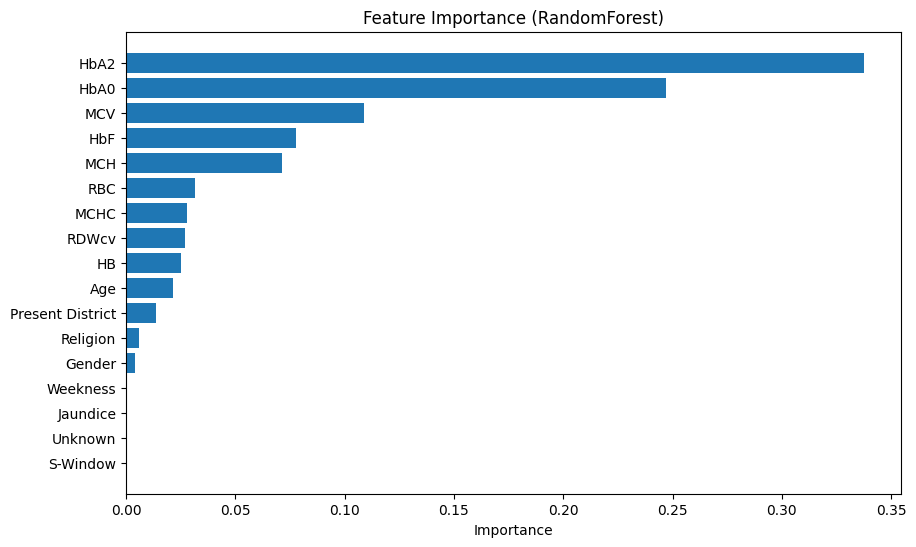

In [36]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X1, y1)  # X1 = data_normalized.drop('Diagnosis', axis=1), y1 = data_normalized['Diagnosis']

# Get feature importance
importances = rf.feature_importances_
indices = importances.argsort()

# Get the top 10 most important features (sorted by importance)
top_n = 10
top_features = [(X1.columns[i], importances[i]) for i in indices[-top_n:]]
top_features_sorted = sorted(top_features, key=lambda x: x[1], reverse=True)  # Sort top 10 features by importance

# Print the top 10 features in ascending order of importance
print("Top 10 Features:")
for feature, importance in top_features_sorted:
    print(f"{feature}: {importance}")

# Plot feature importances for all features
plt.figure(figsize=(10,6))
plt.barh(range(X1.shape[1]), importances[indices])  # Plot all feature importances
plt.yticks(range(X1.shape[1]), [X1.columns[i] for i in indices])
plt.title('Feature Importance (RandomForest)')
plt.xlabel('Importance')
plt.show()

In [37]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Apply SelectKBest with ANOVA F-value (for numerical data)
selector_f = SelectKBest(f_classif, k=10)  # Select top 10 features
X_new_f = selector_f.fit_transform(X1, y1)

# Display selected features
selected_features_f = X1.columns[selector_f.get_support()]
print("Selected Features (ANOVA F-value):", selected_features_f)

# Apply SelectKBest with Chi-square (for categorical data)
selector_chi2 = SelectKBest(chi2, k=10)  # Select top 10 features
X_new_chi2 = selector_chi2.fit_transform(X1, y1)

# Display selected features for chi-square test
selected_features_chi2 = X1.columns[selector_chi2.get_support()]
print("Selected Features (Chi-square):", selected_features_chi2)

Selected Features (ANOVA F-value): Index(['HbA0', 'HbA2', 'HbF', 'RBC', 'HB', 'MCV', 'MCH', 'MCHC', 'RDWcv',
       'Weekness'],
      dtype='object')
Selected Features (Chi-square): Index(['Gender', 'HbA0', 'HbA2', 'HbF', 'RBC', 'HB', 'MCV', 'MCH', 'RDWcv',
       'Weekness'],
      dtype='object')


In [38]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use RFE with Logistic Regression as the estimator
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=10)  # Select top 10 features
X_new_rfe = rfe.fit_transform(X1, y1)

# Display selected features
selected_features_rfe = X1.columns[rfe.get_support()]
print("Selected Features (RFE):", selected_features_rfe)

Selected Features (RFE): Index(['Religion', 'HbA0', 'HbA2', 'HbF', 'RBC', 'HB', 'MCV', 'MCH', 'MCHC',
       'RDWcv'],
      dtype='object')


In [39]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold (features with variance lower than a certain threshold will be removed)
selector_var = VarianceThreshold(threshold=0.01)  # You can adjust the threshold as needed
X_new_var = selector_var.fit_transform(X1)

# Display selected features based on variance
selected_features_var = X1.columns[selector_var.get_support()]
print("Selected Features (Variance Threshold):", selected_features_var)

Selected Features (Variance Threshold): Index(['Age', 'Gender', 'Present District', 'RBC', 'HB', 'MCV', 'MCH', 'MCHC',
       'RDWcv'],
      dtype='object')


In [40]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Apply SelectKBest with mutual information (you've used it earlier, but let's reiterate it here)
selector_mutual = SelectKBest(mutual_info_classif, k=10)  # Select top 10 features
X_new_mutual = selector_mutual.fit_transform(X1, y1)

# Display selected features based on mutual information
selected_features_mutual = X1.columns[selector_mutual.get_support()]
print("Selected Features (Mutual Information):", selected_features_mutual)

Selected Features (Mutual Information): Index(['Age', 'HbA0', 'HbA2', 'HbF', 'RBC', 'HB', 'MCV', 'MCH', 'MCHC',
       'RDWcv'],
      dtype='object')


In [41]:
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel

# Use SVM with linear kernel for feature selection
svc = SVC(kernel='linear')
svc.fit(X1, y1)

# Select important features based on SVM model
sfm_svc = SelectFromModel(svc, threshold="mean")  # Select features with coefficients above the mean
X_new_svc = sfm_svc.transform(X1)

# Display selected features
selected_features_svc = X1.columns[sfm_svc.get_support()]
print("Selected Features (SVM with Linear Kernel):", selected_features_svc)

Selected Features (SVM with Linear Kernel): Index(['HbA0', 'HbA2', 'HbF', 'RBC', 'HB', 'MCV', 'MCH', 'RDWcv'], dtype='object')


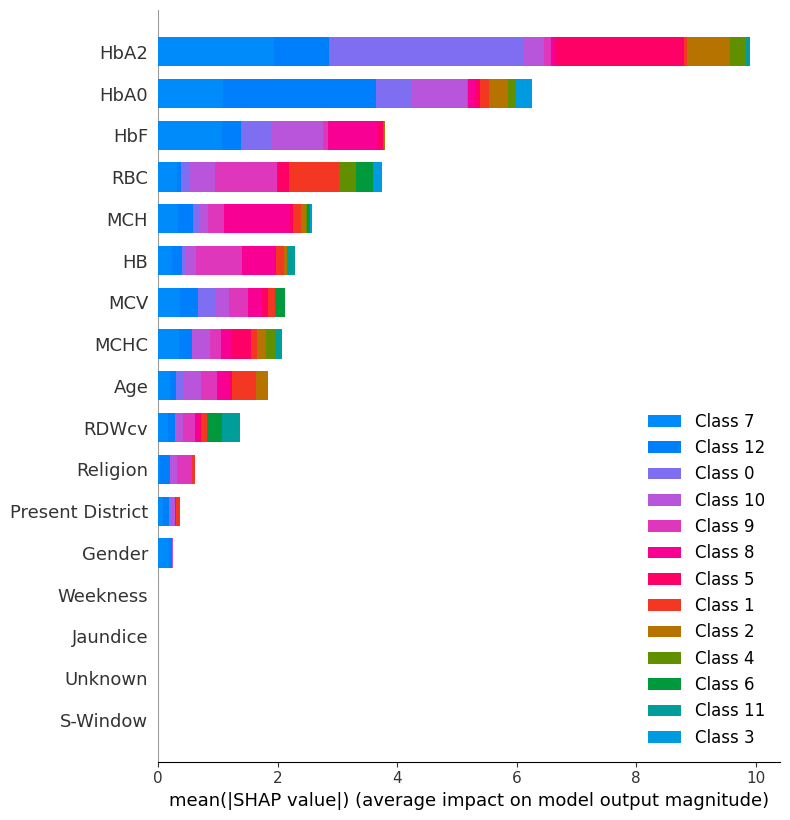

In [42]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Train an XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X1, y1)

# Initialize SHAP explainer for the XGBoost model
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X1)

# Plot summary plot of SHAP values to show feature importance
shap.summary_plot(shap_values, X1)

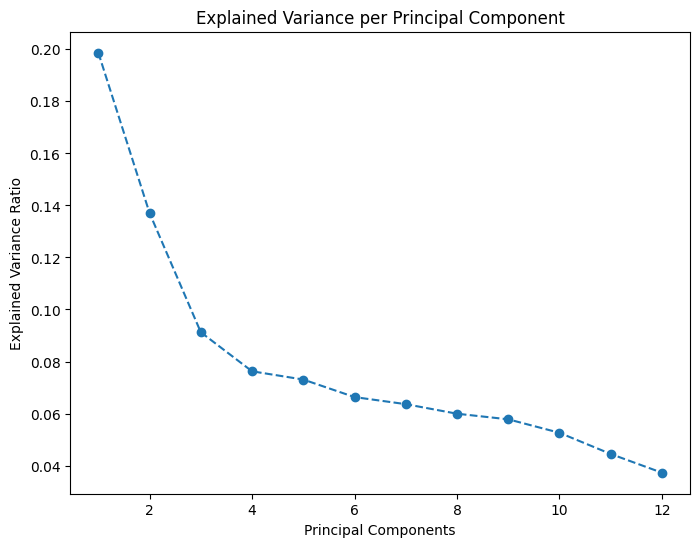

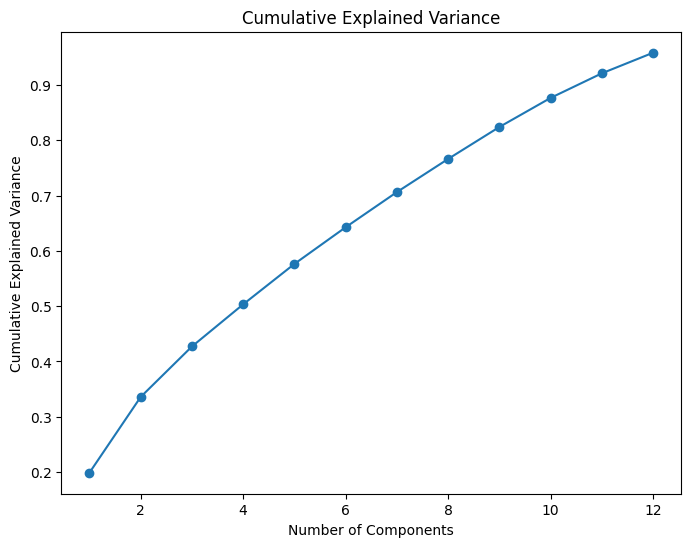

Number of components to retain for 95% variance: 12
Transformed data shape (selected features): (13031, 12)


In [43]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Standardizing the data (you can use data_standardized or data_normalized based on your choice)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Apply PCA to the data
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Plot the explained variance ratio to see how much variance each component explains
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance per Principal Component')
plt.show()

# Cumulative explained variance to decide how many components to retain
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.show()

# Display the number of components to retain
n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components to retain for 95% variance: {n_components}")

# Create a new DataFrame with the selected features (transformed data)
X_selected = X_pca[:, :n_components]  # Select the first 'n_components' components

# Display the shape of the transformed data
print(f"Transformed data shape (selected features): {X_selected.shape}")

In [44]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)

# Apply PCA to the data (retain 95% variance)
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Get the PCA components (loadings) and feature names
pca_components = pca.components_
feature_names = X1.columns  # Assuming X1 is a DataFrame

# Display the component loadings and feature names
pca_components_df = pd.DataFrame(pca_components, columns=feature_names)
print("PCA Components (Feature Loadings):")
print(pca_components_df)

# For each principal component, we want to show the features with the highest absolute loadings
n_components = pca.components_.shape[0]
selected_features = {}

for i in range(n_components):
    sorted_idx = abs(pca_components[i]).argsort()[::-1]  # Sort by absolute value
    top_features = [feature_names[j] for j in sorted_idx[:5]]  # Get top 5 features for each component
    selected_features[f"Principal Component {i+1}"] = top_features

# Print the most significant features for each principal component
print("\nTop Features for Each Principal Component:")
for component, features in selected_features.items():
    print(f"{component}: {features}")

PCA Components (Feature Loadings):
         Age    Gender  Religion  Present District      HbA0      HbA2  \
0   0.110526 -0.014319  0.033853          0.078738  0.259840 -0.220718   
1  -0.156788  0.448431 -0.203972         -0.189396 -0.067238 -0.008736   
2   0.270006  0.076059  0.252896          0.297769 -0.534563  0.540779   
3   0.221071 -0.096437  0.512717          0.463026  0.197648 -0.206052   
4  -0.019467  0.016337 -0.193811         -0.139842 -0.037587  0.049431   
5  -0.203069  0.262899  0.246048          0.233702  0.118013  0.032569   
6   0.799932  0.142370 -0.033666         -0.268996  0.046900 -0.058444   
7   0.199754  0.146323 -0.043451         -0.029600  0.000169 -0.169940   
8  -0.068972  0.240657  0.274790         -0.026863  0.173059 -0.390911   
9   0.116546  0.113675 -0.653666          0.698139  0.119863 -0.062740   
10 -0.062373  0.766469  0.121034          0.036958  0.022521  0.122643   
11 -0.093250 -0.075701  0.058236         -0.029564  0.643154  0.611170   

  

In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Assuming 'X1' is your feature matrix and 'y1' is your target column
# Here, I'm using the LabelEncoder to encode the target column if needed
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y1)

# Calculate Information Gain for each feature (mutual information)
info_gain = mutual_info_classif(X1, y_encoded)

# Create a DataFrame to display the results
info_gain_df = pd.DataFrame({
    'Feature': X1.columns,
    'Information Gain': info_gain
})

# Sort the features by Information Gain in descending order
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Display the features and their Information Gain
print(info_gain_df)

             Feature  Information Gain
5               HbA2          0.271837
4               HbA0          0.253466
11               MCV          0.128173
12               MCH          0.114279
6                HbF          0.076908
14             RDWcv          0.039890
9                RBC          0.039321
10                HB          0.025317
13              MCHC          0.015940
3   Present District          0.012740
16          Jaundice          0.006363
15          Weekness          0.005664
1             Gender          0.005115
0                Age          0.004001
7           S-Window          0.002606
8            Unknown          0.000000
2           Religion          0.000000


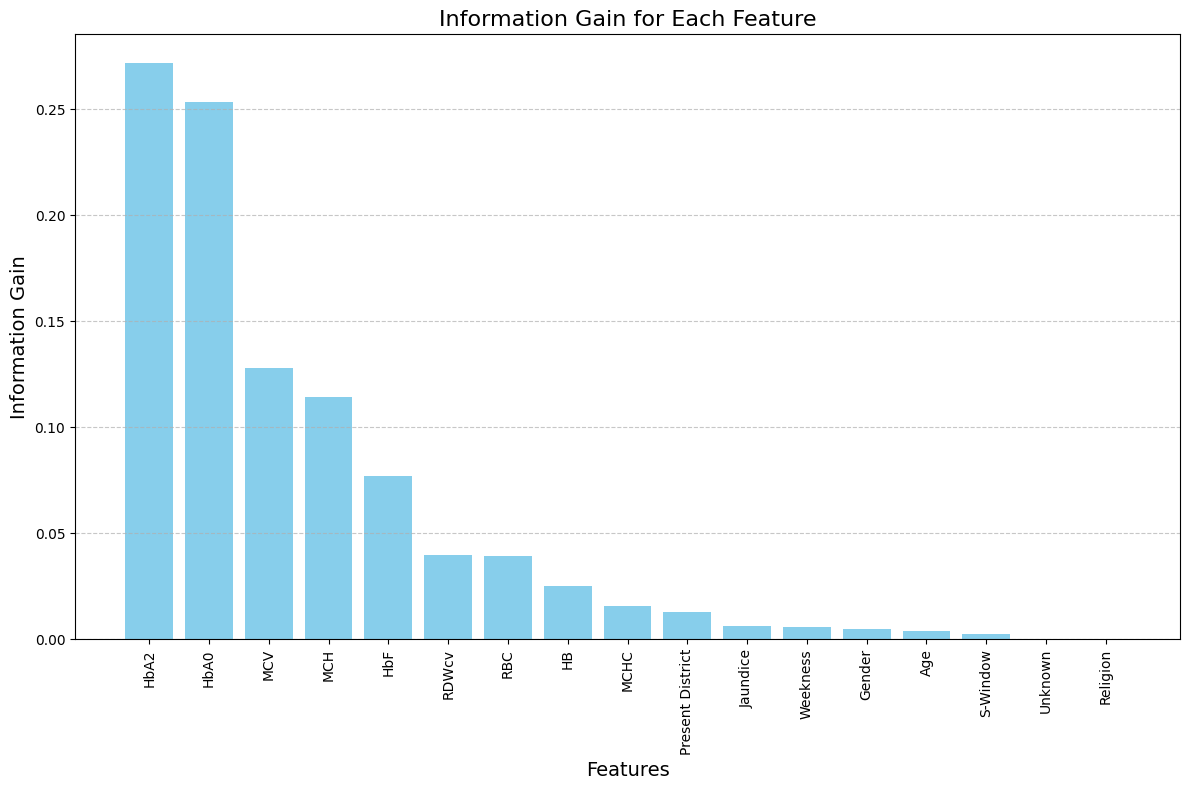

In [46]:
import matplotlib.pyplot as plt

# Sort the DataFrame by Information Gain for better visualization
info_gain_df_sorted = info_gain_df.sort_values(by='Information Gain', ascending=False)

# Plotting the Information Gain as a vertical bar plot
plt.figure(figsize=(12, 8))
plt.bar(info_gain_df_sorted['Feature'], info_gain_df_sorted['Information Gain'], color='skyblue')

# Adding labels and title
plt.title('Information Gain for Each Feature', fontsize=16)
plt.xlabel('Features', fontsize=14)
plt.ylabel('Information Gain', fontsize=14)
plt.xticks(rotation=90)  # Rotate feature names for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

In [47]:
# List of top 11 selected features based
selected_features = ['HbA2', 'HbA0', 'MCV', 'MCH', 'HbF', 'RDWcv', 'RBC', 'HB', 'MCHC', 'Age', 'Gender']

# Select the 11 features from the normalized data along with the target feature
normalized_selected_data_with_target = data_normalized[selected_features + ['Diagnosis']]

# Select the 11 features from the standardized data along with the target feature
standardized_selected_data_with_target = data_standardized[selected_features + ['Diagnosis']]

# Display the first few rows of the selected dataframes with the target feature
print("Selected Features from Normalized Data with Target:")
print(normalized_selected_data_with_target.head())

print("\nSelected Features from Standardized Data with Target:")
print(standardized_selected_data_with_target.head())

Selected Features from Normalized Data with Target:
       HbA2      HbA0       MCV       MCH       HbF     RDWcv       RBC  \
0  0.071770  0.747368  0.527410  0.550218  0.057692  0.351351  0.617073   
1  0.162679  0.754386  0.379962  0.432314  0.076923  0.423423  0.463415   
2  0.086124  0.785965  0.533081  0.410480  0.096154  0.342342  0.739024   
3  0.066986  0.807018  0.376181  0.510917  0.038462  0.414414  0.575610   
4  0.066986  0.680702  0.206049  0.231441  0.038462  0.594595  0.785366   

         HB      MCHC       Age  Gender  Diagnosis  
0  0.632075  0.538462  0.181818       0         12  
1  0.415094  0.538462  0.207792       0          0  
2  0.669811  0.392713  0.207792       1         12  
3  0.471698  0.477733  0.272727       0         12  
4  0.707547  0.453441  0.454545       1         12  

Selected Features from Standardized Data with Target:
       HbA2      HbA0       MCV       MCH       HbF     RDWcv       RBC  \
0 -0.206380 -0.516936  0.147938  0.311604 -0.4361

In [48]:
# Check class distribution in the normalized data
print("Class distribution (Normalized):")
print(normalized_selected_data_with_target['Diagnosis'].value_counts())

# Check class distribution in the standardized data
print("\nClass distribution (Standardized):")
print(standardized_selected_data_with_target['Diagnosis'].value_counts())

Class distribution (Normalized):
Diagnosis
12    11783
0       562
7       546
10       51
5        25
8        20
9        19
1        13
2         6
11        2
4         2
6         1
3         1
Name: count, dtype: int64

Class distribution (Standardized):
Diagnosis
12    11783
0       562
7       546
10       51
5        25
8        20
9        19
1        13
2         6
11        2
4         2
6         1
3         1
Name: count, dtype: int64


In [49]:
from imblearn.over_sampling import SMOTE

# Extract the target variable (Diagnosis) from the normalized and standardized datasets
y_normalized = normalized_selected_data_with_target['Diagnosis']
y_standardized = standardized_selected_data_with_target['Diagnosis']

# Check class distribution in the normalized data
print("Class distribution (Normalized) before SMOTE:")
print(y_normalized.value_counts())

# Apply SMOTE if both classes have more than one instance
if y_normalized.value_counts().min() > 1:
    smote = SMOTE(random_state=42)
    X_normalized_smote, y_normalized_smote = smote.fit_resample(normalized_selected_data_with_target[selected_features], y_normalized)
    print("\nClass distribution after SMOTE (Normalized):")
    print(y_normalized_smote.value_counts())
else:
    print("SMOTE cannot be applied due to extreme class imbalance (Normalized)")

# Check class distribution in the standardized data
print("\nClass distribution (Standardized) before SMOTE:")
print(y_standardized.value_counts())

# Apply SMOTE if both classes have more than one instance
if y_standardized.value_counts().min() > 1:
    X_standardized_smote, y_standardized_smote = smote.fit_resample(standardized_selected_data_with_target[selected_features], y_standardized)
    print("\nClass distribution after SMOTE (Standardized):")
    print(y_standardized_smote.value_counts())
else:
    print("SMOTE cannot be applied due to extreme class imbalance (Standardized)")


Class distribution (Normalized) before SMOTE:
Diagnosis
12    11783
0       562
7       546
10       51
5        25
8        20
9        19
1        13
2         6
11        2
4         2
6         1
3         1
Name: count, dtype: int64
SMOTE cannot be applied due to extreme class imbalance (Normalized)

Class distribution (Standardized) before SMOTE:
Diagnosis
12    11783
0       562
7       546
10       51
5        25
8        20
9        19
1        13
2         6
11        2
4         2
6         1
3         1
Name: count, dtype: int64
SMOTE cannot be applied due to extreme class imbalance (Standardized)


In [50]:
# Save the selected data to CSV files in D:\DWDM Datasets\
normalized_selected_data_with_target.to_csv(r"D:\DWDM Datasets\normalized_data_without_Class_Imbalancing.csv", index=False)
standardized_selected_data_with_target.to_csv(r"D:\DWDM Datasets\standardized_data_without_Class_Imbalancing.csv", index=False)

In [51]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# List of top 11 selected features based
selected_features = ['HbA2', 'HbA0', 'MCV', 'MCH', 'HbF', 'RDWcv', 'RBC', 'HB', 'MCHC', 'Age', 'Gender']

# Assuming 'data_normalized' and 'data_standardized' are already defined and available

# Select the 11 features from the normalized data along with the target feature
normalized_selected_data_with_target = data_normalized[selected_features + ['Diagnosis']]

# Select the 11 features from the standardized data along with the target feature
standardized_selected_data_with_target = data_standardized[selected_features + ['Diagnosis']]

# Display the first few rows of the selected dataframes with the target feature
print("Selected Features from Normalized Data with Target:")
print(normalized_selected_data_with_target.head())

print("\nSelected Features from Standardized Data with Target:")
print(standardized_selected_data_with_target.head())

# Extract features (X) and target (y) for normalized and standardized data
X_normalized = normalized_selected_data_with_target[selected_features]
y_normalized = normalized_selected_data_with_target['Diagnosis']

X_standardized = standardized_selected_data_with_target[selected_features]
y_standardized = standardized_selected_data_with_target['Diagnosis']

# Convert X to DataFrame if not already
X_normalized = pd.DataFrame(X_normalized)
X_standardized = pd.DataFrame(X_standardized)

# Apply RandomOverSampler for class balancing
ros = RandomOverSampler(random_state=42)

# Apply to normalized data
X_normalized_ros, y_normalized_ros = ros.fit_resample(X_normalized, y_normalized)

# Apply to standardized data
X_standardized_ros, y_standardized_ros = ros.fit_resample(X_standardized, y_standardized)

# Convert the resampled target variables to Pandas Series for value_counts()
y_normalized_ros_series = pd.Series(y_normalized_ros)
y_standardized_ros_series = pd.Series(y_standardized_ros)

# Display the class distribution after applying RandomOverSampler
print("\nClass distribution after RandomOversampling (Normalized):")
print(y_normalized_ros_series.value_counts())

print("\nClass distribution after RandomOversampling (Standardized):")
print(y_standardized_ros_series.value_counts())

Selected Features from Normalized Data with Target:
       HbA2      HbA0       MCV       MCH       HbF     RDWcv       RBC  \
0  0.071770  0.747368  0.527410  0.550218  0.057692  0.351351  0.617073   
1  0.162679  0.754386  0.379962  0.432314  0.076923  0.423423  0.463415   
2  0.086124  0.785965  0.533081  0.410480  0.096154  0.342342  0.739024   
3  0.066986  0.807018  0.376181  0.510917  0.038462  0.414414  0.575610   
4  0.066986  0.680702  0.206049  0.231441  0.038462  0.594595  0.785366   

         HB      MCHC       Age  Gender  Diagnosis  
0  0.632075  0.538462  0.181818       0         12  
1  0.415094  0.538462  0.207792       0          0  
2  0.669811  0.392713  0.207792       1         12  
3  0.471698  0.477733  0.272727       0         12  
4  0.707547  0.453441  0.454545       1         12  

Selected Features from Standardized Data with Target:
       HbA2      HbA0       MCV       MCH       HbF     RDWcv       RBC  \
0 -0.206380 -0.516936  0.147938  0.311604 -0.4361

In [52]:
import pandas as pd

# Store the resampled data into new dataframes for further work

# For normalized data
normalized_ros_df = pd.DataFrame(X_normalized_ros, columns=X_normalized.columns)
normalized_ros_df['Diagnosis'] = y_normalized_ros  # Adding target column to the dataframe

# For standardized data
standardized_ros_df = pd.DataFrame(X_standardized_ros, columns=X_standardized.columns)
standardized_ros_df['Diagnosis'] = y_standardized_ros  # Adding target column to the dataframe

# Save the dataframes to CSV files in D:\
normalized_ros_df.to_csv(r"D:\DWDM Datasets\normalized_data_after_random_oversampling.csv", index=False)
standardized_ros_df.to_csv(r"D:\DWDM Datasets\standardized_data_after_random_oversampling.csv", index=False)
